### a) Exact Analytical Solution

Integrating twice:
$$ \frac{du}{dx} = 2x + C_1 $$
$$ u(x) = x^2 + C_1 x + C_2 $$

Applying boundary conditions:
1. $u(0) = 0 \implies C_2 = 0$
2. $u(1) = 0 \implies 1^2 + C_1(1) + 0 = 0 \implies C_1 = -1$

Thus, the exact solution is:
$$ u(x) = x^2 - x $$

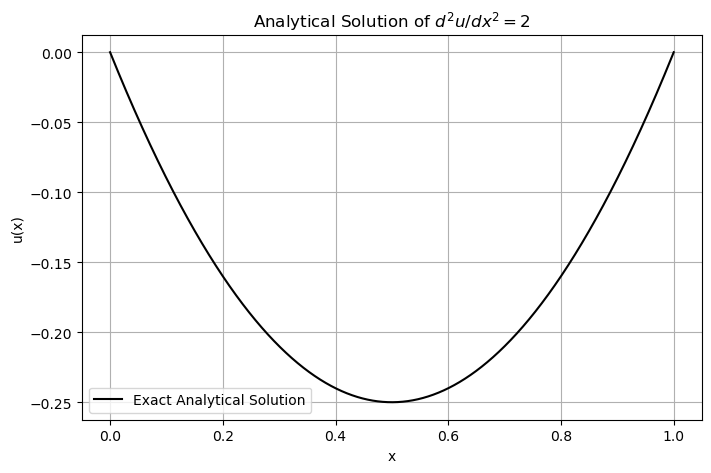

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Define the exact solution
def exact_solution(x):
    return x**2 - x

# Spatial distribution
x_fine = np.linspace(0, 1, 10000)
u_exact = exact_solution(x_fine)

# Plotting
plt.figure(figsize=(8, 5))
plt.plot(x_fine, u_exact, label='Exact Analytical Solution', color='black')
plt.title('Analytical Solution of $d^2u/dx^2 = 2$')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.grid(True)
plt.legend()
plt.show()

### b) Numerical Solution using Finite Difference Method (FDM)

We discretize the domain using $N$ points. The step size is $h = \frac{1}{N-1}$.
Approximating the second derivative:
$$ \frac{u_{i+1} - 2u_i + u_{i-1}}{h^2} = 2 $$
$$ u_{i-1} - 2u_i + u_{i+1} = 2h^2 $$

This forms a system of linear equations $Au = b$ for the interior nodes.

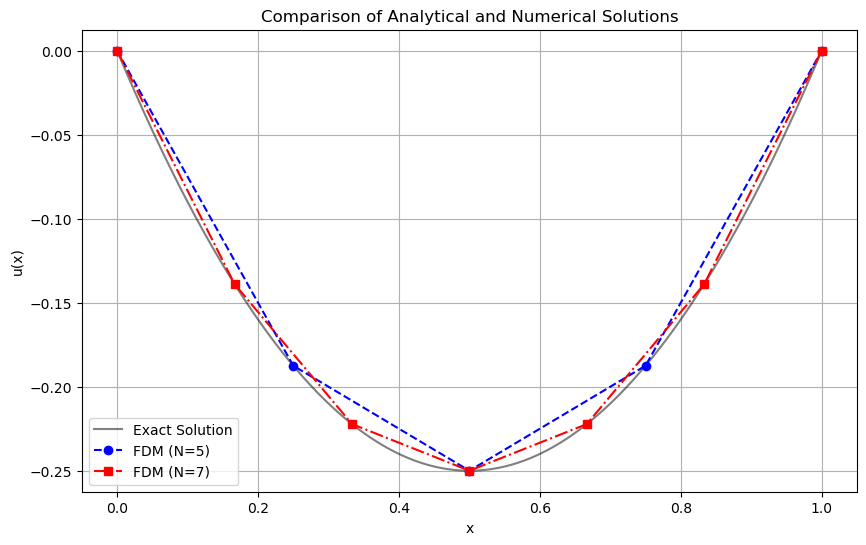

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Define exact_solution and fine grid locally for self-containment
def exact_solution(x):
    return x**2 - x

x_fine = np.linspace(0, 1, 10000)
u_exact = exact_solution(x_fine)

def solve_fdm(num_points):
    # Discretization
    N = num_points
    x = np.linspace(0, 1, N)
    h = x[1] - x[0]
    
    # Unknowns are indices 1 to N-2 (total N-2 unknowns)
    num_unknowns = N - 2
    
    if num_unknowns < 1:
        return x, np.zeros_like(x)

    # Matrix A and vector b construction
    # Equation: u_{i-1} - 2u_i + u_{i+1} = 2 * h^2
    
    A = np.zeros((num_unknowns, num_unknowns))
    b = np.full(num_unknowns, 2 * h**2)
    
    for i in range(num_unknowns):
        A[i, i] = -2
        if i > 0:
            A[i, i-1] = 1
        if i < num_unknowns - 1:
            A[i, i+1] = 1
            
    # Solve for interior points
    u_int = np.linalg.solve(A, b)
    
    # Combine with boundary conditions
    u = np.zeros(N)
    u[1:-1] = u_int
    
    return x, u

# Compute solutions for 5 and 7 points
x_5, u_5 = solve_fdm(5)
x_7, u_7 = solve_fdm(7)

# Plotting Comparison
plt.figure(figsize=(10, 6))
plt.plot(x_fine, u_exact, 'k-', label='Exact Solution', alpha=0.5)
plt.plot(x_5, u_5, 'bo--', label='FDM (N=5)')
plt.plot(x_7, u_7, 'rs-.', label='FDM (N=7)')
plt.title('Comparison of Analytical and Numerical Solutions')
plt.xlabel('x')
plt.ylabel('u(x)')
plt.legend()
plt.grid(True)
plt.savefig('solution_comparison.png') # Save the plot for the report
plt.show()

### c) Quantitative Comparison
Evaluating pointwise percentage error and maximum discrepancy.

In [13]:
import numpy as np

def analyze_errors(x_num, u_num, label):
    u_ex = exact_solution(x_num)
    
    abs_error = np.abs(u_num - u_ex)
    max_discrepancy = np.max(abs_error)
    
    # Calculate percentage error (skip boundaries where solution is 0)
    # Using a mask for non-zero exact values to avoid division by zero
    with np.errstate(divide='ignore', invalid='ignore'):
        percent_error = (abs_error / np.abs(u_ex)) * 100
        percent_error[np.isnan(percent_error)] = 0  # Handle 0/0 at boundaries
        percent_error[np.isinf(percent_error)] = 0  # Handle x/0 if any
        
    print(f"--- Analysis for {label} ---")
    print(f"Maximum Discrepancy: {max_discrepancy:.6e}")
    print("Pointwise % Error:", percent_error)
    print("\n")

analyze_errors(x_5, u_5, "N=5")
analyze_errors(x_7, u_7, "N=7")

--- Analysis for N=5 ---
Maximum Discrepancy: 2.775558e-17
Pointwise % Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 1.48029737e-14
 0.00000000e+00]


--- Analysis for N=7 ---
Maximum Discrepancy: 5.551115e-17
Pointwise % Error: [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.24900090e-14 3.99680289e-14 0.00000000e+00]




In [14]:
import pandas as pd
import numpy as np

# Define exact_solution locally to ensure this cell can run standalone
def exact_solution(x):
    return x**2 - x

def get_matrices_and_solution(N):
    x = np.linspace(0, 1, N)
    h = x[1] - x[0]
    num_unknowns = N - 2
    
    # Reconstruct Matrix A and vector b for display
    A = np.zeros((num_unknowns, num_unknowns))
    b = np.full(num_unknowns, 2 * h**2)
    
    for i in range(num_unknowns):
        A[i, i] = -2
        if i > 0:
            A[i, i-1] = 1
        if i < num_unknowns - 1:
            A[i, i+1] = 1
            
    # Solve (using the same logic as before)
    u_int = np.linalg.solve(A, b)
    u = np.zeros(N)
    u[1:-1] = u_int
    
    return A, b, x, u

# Generate Report
for N in [5, 7]:
    A, b, x, u_fdm = get_matrices_and_solution(N)
    
    print(f"================ SYSTEM REPORT FOR N={N} ================")
    print(f"Step size h = {x[1]-x[0]:.4f}")
    print("\n[ Matrix A ] (Size {}x{})".format(A.shape[0], A.shape[1]))
    print(A)
    print("\n[ Vector b ]")
    print(b)
    
    # Error Analysis Table
    u_ex = exact_solution(x)
    abs_err = np.abs(u_fdm - u_ex)
    
    data = {
        'x': x,
        'u_FDM': u_fdm,
        'u_Exact': u_ex,
        'Difference (Abs Error)': abs_err
    }
    
    df = pd.DataFrame(data)
    print(f"\n[ Results Table for N={N} ]")
    print(df.to_string(index=False, float_format="%.6e"))
    print("\n\n")

================ SYSTEM REPORT FOR N=5 ================
Step size h = 0.2500

[ Matrix A ] (Size 3x3)
[[-2.  1.  0.]
 [ 1. -2.  1.]
 [ 0.  1. -2.]]

[ Vector b ]
[0.125 0.125 0.125]

[ Results Table for N=5 ]
           x         u_FDM       u_Exact  Difference (Abs Error)
0.000000e+00  0.000000e+00  0.000000e+00            0.000000e+00
2.500000e-01 -1.875000e-01 -1.875000e-01            0.000000e+00
5.000000e-01 -2.500000e-01 -2.500000e-01            0.000000e+00
7.500000e-01 -1.875000e-01 -1.875000e-01            2.775558e-17
1.000000e+00  0.000000e+00  0.000000e+00            0.000000e+00



================ SYSTEM REPORT FOR N=7 ================
Step size h = 0.1667

[ Matrix A ] (Size 5x5)
[[-2.  1.  0.  0.  0.]
 [ 1. -2.  1.  0.  0.]
 [ 0.  1. -2.  1.  0.]
 [ 0.  0.  1. -2.  1.]
 [ 0.  0.  0.  1. -2.]]

[ Vector b ]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]

[ Results Table for N=7 ]
           x         u_FDM       u_Exact  Difference (Abs Error)
0.000000e+00  0.0